(demo2022-07-18)=
# Demo Notebook 2022-07-18

Demos from the live sessions on 2022-07-18.


## Setup



In [1]:
import grama as gr
import pandas as pd
import numpy as np
DF = gr.Intention()
%matplotlib inline


## Load the challenge data


In [2]:
df_data = pd.read_csv("../challenges/data/c05-data.csv")
df_data

,E,mu,t,id_machine,id_specimen,id_measurement
0,10113.457096,0.319442,0.250,A,0,g
1,9432.148720,0.308230,0.250,A,1,g
2,10468.172283,0.328422,0.250,A,2,g
3,9474.697920,0.333919,0.250,A,3,g
4,10010.402837,0.310751,0.250,A,4,g
...,...,...,...,...,...,...
715,11935.167126,0.319328,0.125,F,115,l
716,11552.946124,0.317546,0.125,F,116,l
717,11985.579932,0.332173,0.125,F,117,l
718,12092.949690,0.317655,0.125,F,118,l


## Compare across thicknesses

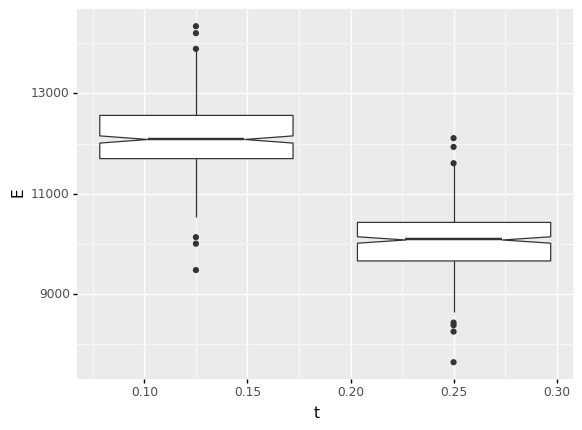

<ggplot: (8726504687951)>

In [3]:
## TODO: Compare elasticity across thicknesses
## NOTE: There are many ways to do this!
(
    df_data
# solution-begin
    >> gr.ggplot(gr.aes("t", "E"))
    + gr.geom_boxplot(gr.aes(group="t"), notch=True)
# solution-end
)

## Fitting a lognorm

In [4]:
## NOTE: No need to edit
df_sub = (
    df_data
    >> gr.tf_filter(
        DF.t == 0.250,
        DF.id_machine != "C",
        DF.id_measurement != "h",
    )
)

In [5]:
df_sub

,E,mu,t,id_machine,id_specimen,id_measurement
0,10113.457096,0.319442,0.25,A,0,g
1,9432.148720,0.308230,0.25,A,1,g
2,10468.172283,0.328422,0.25,A,2,g
3,9474.697920,0.333919,0.25,A,3,g
4,10010.402837,0.310751,0.25,A,4,g
...,...,...,...,...,...,...
245,11308.345649,0.327115,0.25,F,105,l
246,10068.336113,0.322171,0.25,F,106,l
247,9509.337183,0.321234,0.25,F,107,l
248,9174.206339,0.318443,0.25,F,108,l


In [6]:
10/250

0.04

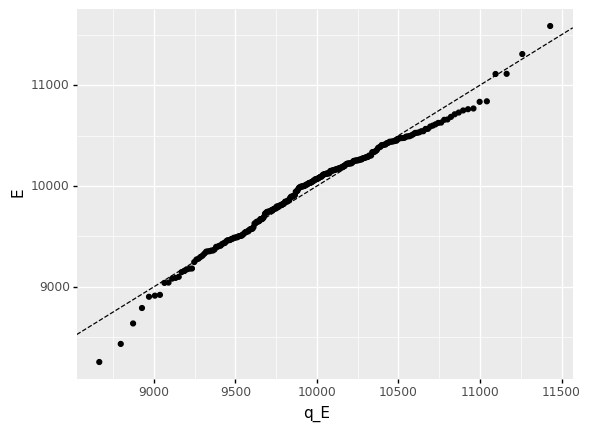

<ggplot: (8726504642211)>

In [7]:
# solution-begin
mg_E = gr.marg_fit(
    "lognorm", 
    df_sub.E, 
    floc=0,
)

mg_E_bad = gr.marg_fit(
    "lognorm", 
    df_sub.E, 
    # floc=0, # Don't set the location parameter to zero
)

(
    df_sub
    >> gr.tf_mutate(
        q_E=gr.qqvals(DF.E, marg=mg_E),
        q_E_bad=gr.qqvals(DF.E, marg=mg_E_bad),
    )
    
    >> gr.ggplot(gr.aes("q_E", "E"))
    + gr.geom_abline(intercept=0, slope=1, linetype="dashed")
    + gr.geom_point()
)
# solution-end

In [8]:
print(mg_E)     # floc == 0
print(mg_E_bad) 

(+0) lognorm, {'mean': '9.965e+03', 's.d.': '4.977e+02', 'COV': 0.05, 'skew.': 0.15, 'kurt.': 3.04}
(+0) lognorm, {'mean': '2.409e+13', 's.d.': '3.298e+26', 'COV': 13691416095072.72, 'skew.': 2.5665226910475562e+39, 'kurt.': 1.2347725193581465e+105}


## Real variability?


In [9]:
## NOTE: No need to edit
df_real = (
    df_sub
    >> gr.tf_group_by(DF.id_specimen)
    >> gr.tf_summarize(
        mu=gr.mean(DF.mu),
        E=gr.mean(DF.E),
    )
    >> gr.tf_ungroup()
)

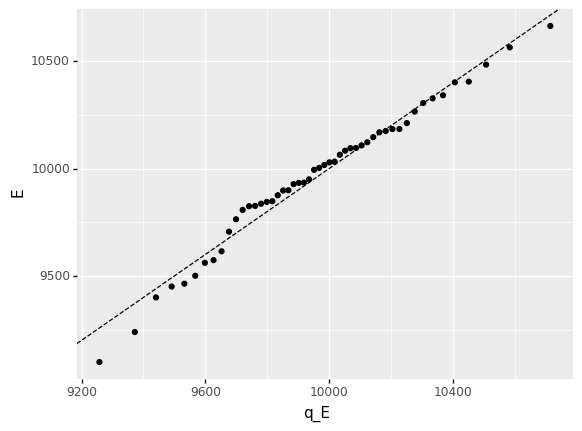

<ggplot: (8726502482327)>

In [10]:
# solution-begin
mg_E = gr.marg_fit(
    "lognorm", 
    df_real.E, 
    floc=0,
)

mg_E_bad = gr.marg_fit(
    "lognorm", 
    df_real.E, 
    # floc=0, # Don't set the location parameter to zero
)

(
    df_real
    >> gr.tf_mutate(
        q_E=gr.qqvals(DF.E, marg=mg_E),
        q_E_bad=gr.qqvals(DF.E, marg=mg_E_bad),
    )
    
    >> gr.ggplot(gr.aes("q_E", "E"))
    + gr.geom_abline(intercept=0, slope=1, linetype="dashed")
    + gr.geom_point()
)
# solution-end

## Further reading

- [When are allowables conservative?](https://arc.aiaa.org/doi/full/10.2514/1.J059578)
